In [1]:
from sklearn import linear_model, metrics
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import string

from nlp_preprocessing_toolbox.helper import __fixation, tokenizer_load_and_parse_corpus

In [2]:
df_raw = tokenizer_load_and_parse_corpus()

100%|█████████████████████████████████████████████████████████████████████████| 14850/14850 [00:01<00:00, 11060.76it/s]


In [96]:
df_raw = pd.read_csv('example.csv')

# df_add = df_raw[(df_raw["#is it number"] == True) & (df_raw["#is next char punc"] == True)]
# for i in range(100):
#     df_raw = pd.concat([df_raw,df_add])

df = df_raw.copy()
df = df[df.columns[1:]]
df = df.astype(int)

In [97]:
df_raw.head()

,char,#is it number,#is it punctuation,#is it period,#is next whitespace,#is previos char number,#is next char number,#is next char period,label
0,1,True,False,False,False,False,True,False,0
1,9,True,False,False,False,True,True,False,0
2,3,True,False,False,False,True,True,False,0
3,6,True,False,False,True,True,True,False,1
4,y,False,False,False,False,False,False,False,0


In [98]:
train_test_split = int(len(df)*0.8)
dfTrain, dfTest = df[0:train_test_split], df[train_test_split:]

X_train = dfTrain.values[:,0:-1]
y_train = dfTrain.values[:,-1]

X_test = dfTest.values[:,0:-1]
y_test = dfTest.values[:,-1]

In [99]:
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

C:\Users\gocal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


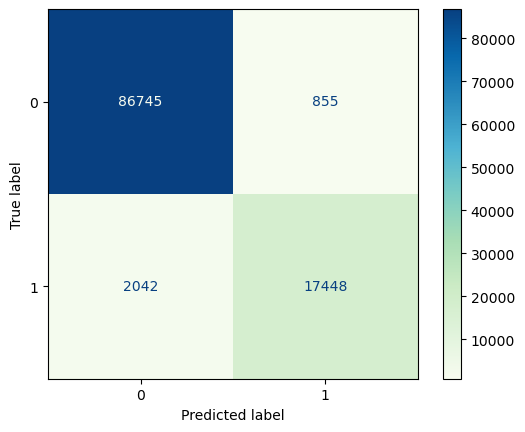

In [100]:
confusion_matrix = metrics.plot_confusion_matrix(logr, X_test, y_test, cmap = "GnBu")
plt.show()

In [111]:
text = '''Çünkü ben de o yaşadığı çevreyi kirleterek bozulmasına neden olan, tüm uyarılara
kulağını tıkayan soya aitim. Kimileri buna kader diyordu, kimileri unut. Bu da
zaman ister, emek ister. İki veli dokunulsa ağlayacaktı. Bu meslek böyledir.
Filmde kamburunu çıkarmış eski Yugoslav lideri, iki kişinin arasında elleri
önden bağlı, cezaevi avlusunda yürüyor. Sabahları hiçbir şey yemeden içmeden,
paldür küldür çıkıyorum evden. Bu albüm hit şarkı çıkarmaz, dedim.
12.02.2018 tarihinde saat tam 15:45'te burada ol.'''

text = '''Saçma ve Gereksiz Bir Yazı.
Bakkaldan 5 TL'lik 2 çikola-
ta al. 12.02.2018 tarihinde saat tam 15:45'te yap-
malıyız bu işi. Tamam mı? Benimle esatmahmutbayol@gmail.com 
adresinden iletişime geçebilirsin. Yarışta 1. oldu. Doç. Dr. 
Esat Bayol'un(Böyle bir ünvanım yok!) yanından geliyorum.
12 p.m. mi yoksa 12 a.m. mi? 100 milyon insan gelmiş! www.deneme.com.tr 
adresinden sitemizi inceleyebilirsin. 24 Eylül 2018 Pazartesi günü ge-
lecekmiş. 19 Mayıs'ı coşkuyla kutladık.
Sonra dedi ki "Ben seni sevmiyorum."'''

text = __fixation(text)

text = " " + text.replace("\n", " ") + " "
lines = []
for idx, char in enumerate(text):

    isItPunc, isItPeriod, isItWhitespace, isNextWhitespace, isPrevNumber, isNextNumber, isNextPunc, isItNum, isNextPeriod = \
        False, False, False, False, False, False, False, False, False
    
    if char != " " and idx != 0 and idx != len(text)-1:
        if char in string.punctuation                   : isItPunc = True
        if char == "."                                  : isItPeriod = True
        if char.isnumeric()                             : isItNum = True
        if text[idx+1] == " "                           : isNextWhitespace = True
        if text[idx+1] == "."                           : isNextPeriod = True
        if text[idx-1].isnumeric()                      : isPrevNumber = True
        if text[idx+1].isnumeric()                      : isNextNumber = True
        if text[idx+1] in string.punctuation            : isNextPunc = True

        row = {
                "char" : char,
                "#is it number" : isItNum,
                "#is it punctuation" : isItPunc,
                "#is it period" : isItPeriod,
                "#is next whitespace" : isNextWhitespace,
                "#is previos char number" : isPrevNumber,
                "#is next char number" : isNextNumber,
#                 "#is next char punc" : isNextPunc,
                "#is next char period" : isNextPeriod,
        }
        lines.append(row)

df_text = pd.DataFrame.from_records(lines)
df_real_test = df_text.values[:,1:]
df_real_test

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, True],
       [False, True, True, ..., False, False, False],
       [False, True, False, ..., False, False, False]], dtype=object)

In [112]:
pred = logr.predict(df_real_test)

In [113]:
df_text["label"] = pred
df_text

,char,#is it number,#is it punctuation,#is it period,#is next whitespace,#is previos char number,#is next char number,#is next char period,label
0,S,False,False,False,False,False,False,False,0
1,a,False,False,False,False,False,False,False,0
2,ç,False,False,False,False,False,False,False,0
3,m,False,False,False,False,False,False,False,0
4,a,False,False,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...
427,r,False,False,False,False,False,False,False,0
428,u,False,False,False,False,False,False,False,0
429,m,False,False,False,False,False,False,True,1
430,.,False,True,True,False,False,False,False,0


In [114]:
tokens = []
last_idx = 0
temp = ""
for idx, row in df_text.iterrows():
    if row.label == 0: temp += row.char
    elif row.label == 1:
        temp += row.char
        tokens.append(temp)
        temp = ""
        last_idx = idx

In [115]:
tokens

['Saçma',
 've',
 'Gereksiz',
 'Bir',
 'Yazı',
 '.',
 'Bakkaldan',
 '5',
 "TL'lik",
 '2',
 'çikolata',
 'al',
 '.',
 '12',
 '.02',
 '.2018',
 'tarihinde',
 'saat',
 'tam',
 "15:45'te",
 'yapmalıyız',
 'bu',
 'işi',
 '.',
 'Tamam',
 'mı?',
 'Benimle',
 'esatmahmutbayol@gmail',
 '.com',
 'adresinden',
 'iletişime',
 'geçebilirsin',
 '.',
 'Yarışta',
 '1',
 '.',
 'oldu',
 '.',
 'Doç',
 '.',
 'Dr',
 '.',
 'Esat',
 "Bayol'un(Böyle",
 'bir',
 'ünvanım',
 'yok!)',
 'yanından',
 'geliyorum',
 '.',
 '12',
 'p',
 '.m',
 '.',
 'mi',
 'yoksa',
 '12',
 'a',
 '.m',
 '.',
 'mi?',
 '100',
 'milyon',
 'insan',
 'gelmiş!',
 'www',
 '.deneme',
 '.com',
 '.tr',
 'adresinden',
 'sitemizi',
 'inceleyebilirsin',
 '.',
 '24',
 'Eylül',
 '2018',
 'Pazartesi',
 'günü',
 'gelecekmiş',
 '.',
 '19',
 "Mayıs'ı",
 'coşkuyla',
 'kutladık',
 '.',
 'Sonra',
 'dedi',
 'ki',
 '"Ben',
 'seni',
 'sevmiyorum',
 '."']

In [122]:
df_text[50:100]

,char,#is it number,#is it punctuation,#is it period,#is next whitespace,#is previos char number,#is next char number,#is next char period,label
50,.,False,True,True,True,False,False,False,1
51,1,True,False,False,False,False,True,False,0
52,2,True,False,False,False,True,False,True,1
53,.,False,True,True,False,True,True,False,0
54,0,True,False,False,False,False,True,False,0
55,2,True,False,False,False,True,False,True,1
56,.,False,True,True,False,True,True,False,0
57,2,True,False,False,False,False,True,False,0
58,0,True,False,False,False,True,True,False,0
59,1,True,False,False,False,True,True,False,0
